> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Fundamentos de Mecánica Cuántica 


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle\! \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $

In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
import copy 

ModuleNotFoundError: No module named 'qiskit.tools'

## Axiomas

Los axiomas de la Mecánica Cuántica son unos pilares heurísticos, es decir,  basados en la experimentación. La axiomática más aceptada es   la denominada  <i>interpretación de Copenhagen</i> 

<a id='axiomas-I'></a>
::::::{card} 
<b>Postulado I</b>: </i>Vector de estado</i> 

^^^
    
En un instante, $t$, la <i>máxima información accesible</i> de un sistema cuántico <i>aislado</i> está asociada a un vector $\ket{\psi}$ de norma unidad, perteneciente a un espacio de Hilbert $\Hil$

::::::
 La palabra *estado* es engañosa por cuanto parece indicar que el sistema *está* en alguna estado concreto definido por un valor concreto de sus propiedades, ¡esto no es así!  El vector de estado se conoce también con el nombrede  *función de onda*


Dos vectores que difieran en una *fase global* contienen idéntica informacuón y, por tanto,  representan al mismo estado: ningún experimento permite distinguirlos

$$
\ket{\psi} \sim \ket{\psi'} =  e^{i\varphi}\ket{\psi} \, ,
$$

    
La dinámica de un sistema cuántico  está contenido en un *operador hermítico* $H = H^\dagger$ que se denomina **operador Hamiltoniano**



El operador Hamiltoniano  *gobierna su evolución*. Supongamos que el sistema se prepara a $t=0$ en un cierto estado $\ket{\psi(0)}$


::::::{card} 
<b>Postulado  II</b>: </i>Evolución con el tiempo</i> 

^^^

    
El cambio continuo en el tiempo de  $\ket{\psi(t)}$ de un sistema cuya dinámica obedece a un Hamiltoniano $H(t)$,  es <i>determinista</i> y es solución de la <i>Ecuación de Schrödinger</i>
 

$$
 \frac{\partial\ket{\psi(t)}}{\partial t} =-\frac{i}{\hbar} H(t) \ket{\psi(t)} \, \label{eqschr}
$$

::::::


La ecuación de Schrödinger es una ecuación diferencial ordinaria (una sola variable) para un vector. Dada una contición inicial $\ket{\psi(t=0)} = \ket{\psi_0}$, la solución $\ket{\psi(t)}$ para todo $t$ es única.

Por tanto, la evolución del estado es *determinista*. Es en la medida sobre el sistema donde la Mecánica Cuántica muestra su carácter probabilístico. Vamos a mencionar en este capítulo la medida proyectiva, que es el caso más simple. Estudiaremos  en el [capítulo 5](../05_Fun_Info_Cuant/Fun_Info_Cuant.ipynb) que son un caso particular del tipo más general de medidas posible  

::::::{card} 
<b>Postulado III</b>: </i>Medidas proyectivas, o de Von Neumann</i> 

^^^
<a id='postul_III_medida'></a>

    
- A una magnitud física medible le está asociado   un operador hermítico  $ A= A^\dagger$ que denominamos <b>observable</b>.


- Los resultados de una medición no pueden dar como resultado nada más que uno de los valores propios de $A \Rightarrow \lambda_n$.
    
    
- <i> Regla de Born</i>: La probabilidad de obtener  el autovalor $\lambda_k$ como resultado de una cierta medición, viene dada por
la expresión

$$
p(\lambda_k)~ = ~|\braket{\lambda_k}{\psi}|^2
$$ 
donde $\ket{\lambda_k}$ es el autovector asociado. 


::::::
    

- la intepretación probabilística de las componentes del *vector de estado* las que fuerzan a que sea unitario. Efectivamente 
como la suma de todas las probabilidades debe ser igual a la unidad
$$
1 = \sum_k \lambda_k = \sum_k \braket{\psi}{\lambda_k}\braket{\lambda_k}{\psi} = \bra{\psi}\left(\sum_k\ketbra{\lambda_k}{\lambda_k}\right) \ket{\psi} = \braket{\psi}{\psi}
$$

- que las magnitudes medibles son números reales, exige que el operador $A$ asociado a un observable deba ser hermítico 

La fórmula dada para $p(\lambda_k)$  es cierta cuando el autovalor en cuestion es *no degenerado*. 
Cuando $\lambda_k$ tiene degeneración $d_k$ debe generalizarse:

$$
\begin{array}{rcl}
p(\lambda_k)~ &=& ~ \sum_{a=1}^{d_k}|\braket{\lambda^a_k}{\psi}|^2 = \bra{\psi}\left(
 \sum_{a=1}^{d_k}\ketbra{\lambda^a_k}{\lambda^a_k}\right) \ket{\psi}\nonumber\\
&=&  \bra{\psi}P_k\ket{\psi} \rule{0mm}{7mm}\\
\end{array}
$$

La última expresión revela que $p(\lambda_k)$ no es más que el *valor esperado del proyector* $P_k = P^2_k$ en el estado del sistema anterior a la medida. 



::::::{admonition} Nota
:class: note



- *Muy importante*:  $\{\lambda_k,p(\lambda_k)\}$ no es una variable <i>pseudo-aleatoria</i> sino, probablemente, la única  variable intrínsecamente aleatoria que existe en la naturaleza.  
    
    
::::::


El hecho de medir tiene consecuencias *irreversibles* sobre el sistema medido. Este hecho es, sin duda, el efecto más diferenciador de la Mecánica Cuántica sobre la clásica: no existe el concepto de *partícula de prueba*, aquella que obtiene información de un sistema sin perturbarlo, como los planetas en el sistema solar

::::::{card} 
<b>Postulado IV</b>: </i>Colapso de la función de  onda</i> 

^^^
  
Si el resultado de una medida efectuada sobre un sistema en un estado $\ket{\psi}$  ha sido  $\lambda_n$,  inmediatamente después de la medida, el estado del sistema viene dado por el vector propio asociado  
$\ket{\lambda_n} \in \Hil$, normalizado $|\braket{\lambda_n}{\lambda_n}|=1$
   
::::::
 

El sistema del medidor y el sistema medido, son a su vez un sistema aisado ¿por qué no parecen obedecer a las reglas de un sistema cuántico? ¿cuál es el límite que marca la distinción entre un objeto cuántico y uno clásico capaz de hacer colapsar el estado de otro? El axioma del *colapso de la función de onda* es heurístico y ha suscitado intensos debates desde su formulación. El más famoso es el de la paradoja del Gato de Schrödinger.


## Medidas y valores esperados


En Mecánica Cuántica especificamos un estado en las componentes de la expansión de un estado en *una base* ortonormal.
Existen infinitas bases posibles para expresar un vector. ¿Qué base es la mejor? La respuesta es que depende del proceso que estudiemos.

Por ejemplo, si el proceso es *la medida* de un cierto observable $A=A^\dagger$, el resultado de nuestra medición sólo puede ser uno de los *valores propios* $\lambda_i$
$$
A \ket{\lambda_k} = \lambda_k \ket{\lambda_k}\, 
$$
donde $\ket{\lambda_k}$ son los autovectores ${k=1,2,...}$ que forman una base ortonormal. Ésta es la base natural adaptada a procesos de medida de $A$. En particular para conocer *con qué probabilidad* se producirá cada resultado, expandiremos el estado en dicha base de autoestados  

$$
\ket{\psi} = \sum_{i=1}^N a_i \ket{\lambda_i}\, 
$$

El axioma IV (regla de Born) afirma que <i>la probabilidad de aparición</i> del resultado $\lambda_i$ es precisamente 

$$
p(\lambda_i)=|\braket{\lambda_i}{\psi}|^2  = |a_i|^2 \, 
$$


La forma de tener acceso experimental a los números $p(\lambda_i)$  es mediante la **repetición estadística**. Si efectuamos la medida un número $n$ de veces con $n\to \infty$, y contamos la frecuencia de aparición de los distintos $\lambda_i$
en el límite $n\to \infty$ dicha frecuencia experimental convergerá a la probabilidad teórica

$$
\lim_{n\to\infty} \frac{n(\lambda_i)}{n} =  p(\lambda_i)  = |a_i|^2   \, .
$$



Vemos que, mediante repetición estadística, solamente podemos recuperar el *módulo de las amplitudes* 

$$
|a_i| = \lim_{n\to\infty} \sqrt{\frac{n(\lambda_i)}{n} }
$$ 




::::::{admonition} Notar
:class: note


    
- En Computación Cuántica, almacenamos la información en las amplitudes $a_i$ en una base dada (la base computacional). Vemos que sólamente su módulo $|a_i|$ es recuperable a través de medidas.
    
    
- Cada vez que seleccionamos un estado $\ket{\psi}$, y un observable $A$, se genera una variable aleatoria $(\lambda,p(\lambda))\, \to $ en cada medida de $A$ sobre $\ket{\psi}$ obtenemos un autovalor $\lambda_i$ con una probabilidad $p(\lambda_i)$.
La repetición del experimento permite reconstruir estimadores estadísticos. 
  

::::::


::::::{admonition} Ejercicio
:class: tip


Generaliza las expresiones anteriores al caso en que los autovalores $\lambda_k$ puedan ser  $d_k$ veces degenerados.
::::::


### Valores esperados
<a id='valores_esperados'></a>

Rescribamos la probabilidad de encontrar $\lambda_k$ en el caso de que sea $d_k$ veces degenerado

$$
\begin{array}{rcl}
p(\lambda_k) &=& \sum_{a=1}^{d_k} |\braket{\lambda^a_k}{\psi}|^2  = 
\sum_{a=1}^{d_k} \braket{\psi}{\lambda^a_k}\braket{\lambda^a_k}{\psi} \nonumber\\ \rule{0mm}{8mm}
&=&\bra{\psi} \left( \sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k}  \right) = \bra{\psi}P_k \ket{\psi} 
\end{array}
$$
donde 

$$
P_k = \sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k}
$$
es el proyector sobre el subespacio propio


Por el *valor esperado* $\langle A\rangle$ del *observable* $A$ en el estado $\ket{\psi}$, entendemos el *valor medio* de la variable aleatoria $\lambda_n$ obtenida por el método descrito. 


\begin{eqnarray}
\langle A\rangle &= &  \sum_k \lambda_k p(\lambda_k)
   =  \sum_k \lambda_k \bra{\psi}P_k\ket{\psi}  
&=& \bra{\psi}\left(\sum_k \lambda_k P_k  \right) \ket{\psi} 
\end{eqnarray}

Reconocemos entre paréntesis la descomposición espectral de $A$. Llegamos así a la siguiente expresión para el valor esperado de un observable $A$ en un estado $\ket{\psi}$

::::::{card} 
<b>Teorema</b>:  

^^^
$$\langle A \rangle=\bra{\psi}A \ket{\psi} $$
::::::

En particular, las probabilidades mismas se pueden expresar como *valores esperados del proyector asociado*

$$
p(\lambda_k ) =  \bra{\psi}P_k\ket{\psi} = \langle P_k\rangle 
$$
El espectro de un observable está formado por números reales que podemos ordenar $\lambda_{min}<...<\lambda_{max}$.
El valor esperado de un observable en uno de sus autoestados coincide con el autovalor asociado

$$
\bra{\lambda_i}A \ket{\lambda_i} = \bra{\lambda_i}\lambda_i \ket{\lambda_i}  = \lambda_i \braket{\lambda_i}{\lambda_i} = \lambda_i
$$


El valor esperado de un observable $A$ está acotado entre sus valores propios mínimo y máximo

$$
\lambda_{min} \leq \bra{\psi}A\ket{\psi} \leq \lambda_{max}
$$

y las desigualdades anteriores se saturan en los autoestados correspondientes $\ket{\psi} = \ket{\lambda_{max/min}}$


#### Desviación estándar
<a id='desviacion_estandar'></a>

La *varianza*  es la media de la desviación cuadrática de la variable aleatoria $(\lambda,p(\lambda))$ es decir 


$$
~~\sigma ^2 = \overline{(\lambda_i-\bar\lambda_i)^2}= \overline{\lambda^2} - \overline{\lambda}^2
$$
de aquí se sigue, para la desviación estándar

::::::{card} 
<b>Teorema</b>:  

^^^
   
$$ \sigma = \sqrt{\bra{\psi}A^2\ket{\psi} - \bra{\psi} A\ket{\psi}^2}
$$

::::::


Evaluada en un estado propio $\ket{\lambda_i}$, la varianza de un operador es cero

$$
\sigma^2 = \bra{\lambda_i}A^2\ket{\lambda_i} - \bra{\lambda_i} A\ket{\lambda_i}^2 = \bra{\lambda_i}\lambda_i^2\ket{\lambda_i} - \bra{\lambda_i} \lambda_i\ket{\lambda_i}^2 = 0
$$

In [2]:
' funcion que toma una matriz y un vector normalizado  y devuelve el valor esperado y la desviación '
def vev_sig(A, ket):

    assert np.round(np.sqrt(np.dot(ket.conj().T,ket)[0,0]).real,5)  == 1. # chequeamos que la norma es unidad
    bra = ket.conj().T
    
    'el valor esperado'
    vev = np.dot(bra,np.dot(A,ket))[0,0].real
   
    'la varianza'
    A2 = np.dot(A,A)
    var= np.dot(bra,np.dot(A2,ket))[0,0] - vev**2
    sig = np.sqrt(np.abs(var.real))
    
    return(np.round(vev,5), np.round(sig,10))

In [3]:
' definamos una matriz hermítica '
#np.random.seed(10) 
A = np.matrix(np.random.randn(3,3) + np.random.randn(3,3)*1j)
A +=  A.getH()
eigvals, eigvecs = np.linalg.eigh(A)
' mostramos los autovalores '
np.round(eigvals,4)

array([-4.1297,  0.0538,  2.4621])

A continuación evaluamos el valor esperado en un vector aleatorio, y en dos autovectores de $A$

In [4]:
'definamos un ket'
vec1 = np.random.randn(len(A),1)   # este es un autovector aleatorio
vec2 = eigvecs[:,0]           # este es el autovector de autovalor mínimo
vec3 = eigvecs[:,-1]          # éste es un autovector de autovalor máximo

ket = vec2       # elegimos uno 

'normalizado'
norma=np.sqrt(np.dot(ket.conj().T,ket)[0,0]).real 
uket = ket/norma


vev, sig = vev_sig(A,uket)

print('<A>= ',vev, ' sigma = ', sig)


<A>=  -4.12973  sigma =  5.96e-08


## Evolución temporal

### Ecuación de Schrödinger

El estado de un sistema $\ket{\psi(t)}$ posee la máxima información instantánea accesible de un sistema, es decir, a un tiempo dado $t$. 
Dado $\ket{\psi(t_0)}$ en un instante inicial $t_0$, la evolución posterior obedece a la  ecuación diferencial de Schrödinger

$$
 \displaystyle \frac{d}{d t}\ket{\psi(t)} =-\frac{i}{\hbar} H(t) \ket{\psi(t)} \, .
$$


Hemos enfatizado el hecho de que, en el caso más general, $H(t)$ puede depender del tiempo.



::::::{admonition} Notar
:class: note



Las cantidades que entran en la ecuación de Schrödinger *tienen unidades*: 

- $H$ tiene unidades de *energía*. En el SI (Sistema Iternacional) $\to$ $\hbox{Julios = J}$


- $t$ tiene unidades de *tiempo*, en el SI $\to$ $\hbox{segundos = s}$


- $\hbar$ es la constante de Planck, y  tiene unidades de *acción*= energía $\times$  tiempo. En el SI  $\to $ $\hbox{Julios}\cdot\hbox{segundo} =  \hbox{J}\cdot\hbox{s}$. $~$ Se trata de una *cantidad universal* 
$$
\boxed{\hbar = 1.054\times 10^{-34}~~ \hbox{J}\cdot\hbox{s}}
$$

::::::


#### Conservación de la probabilidad.

La *hermiticidad* de $H$ se relaciona directamente con la interpretación probabilística de $\ket{\psi}$.

::::::{card} 
<b>Teorema</b>:  

^^^

En la evolución temporal se conserva la norma del vector de estado
::::::


:::{dropdown} Prueba

\begin{eqnarray*}
\frac{d}{dt}\|\ket{\psi}\|^2 = \frac{d}{dt}\braket{\psi(t)}{\psi(t)} &=& \left(\rule{0mm}{3mm}\frac{d}{dt}\bra{\psi(t)}\right)\ket{\psi(t)} + 
\bra{\psi(t)}\left(\frac{d}{dt}\ket{\psi(t)} \right)\nonumber\\
&=& \left(\bra{\psi(t)}\frac{i}{\hbar}H^\dagger\right)\ket{\psi(t)} + \bra{\psi(t)}\left(-\frac{i}{\hbar}H\ket{\psi(t)} \right) \nonumber\\
&=&\frac{i}{\hbar} \bra{\psi(t)}(H^\dagger - H)\ket{\psi(t)} = 0
\end{eqnarray*}

Es decir: $\|\ket{\psi}\|$ no cambia con el tiempo, y 
esto implica que la norma de $\ket{\psi(t)}$ se conserva $\Rightarrow 1 = \|\ket{\psi(0)}\| =\|\ket{\psi(t)}\|$
:::



### Operador de Evolución
<a id='operador_evolucion'></a>

La conservación de la norma implica que la evolución $\|\ket{\psi(0)\|} =\|\ket{\psi(t)}\|$ es un *proceso unitario*. 
En otras palabras, debe existir un operador unitario 

$$
U(t,t_0)^{-1}= U(t,t_0)^\dagger 
$$

que lleve el estado inicial al actual a tiempo $t$

$$
 U(t,t_0): \ket{\psi(t_0)}~~ \to~~ \rule{0mm}{3.5mm} \ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}
$$


::::::{admonition} Notar
:class: note



    
El operador de evolución satisface las siguientes propiedades

 -  $U(t_0,t_0) = I$ \, .
 

 -  transitividad:  $U(t,t_1)U(t_1,t_0)= U(t,t_0)$
 
 
 -  invertibilidad: $U(t,t_0)^{-1} = U(t_0,t)$
 

::::::


Evidentemente, el operador de evolución debe estar relacionado con el Hamiltoniano, que es quien gobierna la dinámica. Veamos a ver que hay una ecuación de Schrödinger también para el operador de evolución

::::::{card} 
<b>Teorema</b>:  

^^^

El operador de evolución satisface la siguiente ecuación de evolución

$$
 \frac{d}{dt}U(t,t_0) = -\frac{i}{\hbar} H(t)\, U(t,t_0)
$$

::::::
:::{dropdown} Demostración
Tomando la derivada temporal de la ecuación $\ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}$, que define $U(t,t_0)$, tenemos para cada miembro

$$
\begin{array}{rcl}
\frac{d}{dt}\ket{\psi(t)} &~=~& -\frac{i}{\hbar}  H(t)\ket{\psi(t)} = -\frac{i}{\hbar} H(t)U(t,t_0)\ket{\psi(t_0)}  \nonumber\\
\frac{d}{dt}U(t,t_0)\ket{\psi(t_0)} &~=~& \left(\frac{d}{dt}U(t,t_0)\right)\ket{\psi(t_0)}
\end{array}
$$

Igualando ambas expresiones, y teniendo en cuanto que $\ket{\psi_0}$ es arbitrario, obtenemos la ecuación deseada.
:::


#### $H$ independiente del tiempo

Cuando $H$ no depende del tiempo podemos dar una expresión analítica para el operador de evolución

::::::{card} 
<b>Teorema</b>:  

^^^
    
Para un hamiltoniano $H$ independiente del tiempo, el operador de evolución $U(t,t_0)$ es

$$
U(t,t_0) = \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)
$$

::::::
:::{dropdown} Demostración
Basta con demostrar que se satisface la ecuación de evolución y la condición de contorno

$$
\begin{array}{rcl}
\frac{d}{dt}U(t,t_0) &=& \frac{d}{dt} \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)
    \nonumber\\ \rule{0mm}{6mm}
   &=& \frac{d}{dt}\left( I +(t-t_0)\left(-\frac{i}{\hbar} H\right) + \frac{1}{2!} 
    (t-t_0)^2\left(-\frac{i}{\hbar} H\right)^2  + ...\right) \nonumber\\ \rule{0mm}{6mm}
    &=& 0 +  \left(-\frac{i}{\hbar} H\right) +  (t-t_0)\left(-\frac{i}{\hbar} H\right)^2  + ... \nonumber\\ \rule{0mm}{6mm}
&=&  \left(-\frac{i}{\hbar} H\right)\left( I + (t-t_0) \left(-\frac{i}{\hbar} H\right) + ...\right)
  \nonumber \\ \rule{0mm}{6mm} 
&=& \left(-\frac{i}{\hbar} H\right) \exp\left({-\frac{i}{\hbar} (t-t_0)H}\right)    \nonumber\\ \rule{0mm}{6mm}
&=& -\frac{i}{\hbar} H \,  U(t,t_0)
\end{array}
$$

Además

$$
U(t_0,t_0) =  \exp\left({-\frac{i}{\hbar} (t_0-t_0)H}\right)=\exp(0) = I
$$

:::


::::::{admonition} Notar
:class: note



que la cantidad ${-\frac{i}{\hbar} (t-t_0) H }$ es adimensional

$$
\frac{1}{\hbox{J}\cdot \hbox{s}}\hbox{s}\cdot\hbox{J} = 1
$$ 

Es decir, es un número puro. Por eso podemos exponenciarla. El operador de evolución $U(t,t_0)$ es, por tanto, también, una magnitud adimensional.
::::::


::::::{admonition} Ejercicio
:class: tip


Escribe una función <i>psi(t,psi0,H)</i> que reciba como argumentos el array <i>psi0</i> de componentes de $\ket{\psi(0)}$, una matriz hermítica <i>H</i>, y un valor de <i>t</i>, y devuelva un vector columna correspondiente a $\ket{\psi(t)}$. Considera $\hbar=1$.
::::::


In [5]:
def psi(t,psi0,H):
    lpsi = len(psi0)
    lH = H.shape[0]
    assert lpsi == lH
    
    psi0ket =np.array(psi0).reshape(lpsi,1)
    psitket = np.dot(expm(- 1j*t*H),psi0ket)
    return psitket

::::::{admonition} Ejercicio
:class: tip


Crea un Hamiltoniano aleatorio $2\times 2$ y considera que la base en la que está escrito es $\{\ket{0},\ket{1}\}$. Partiendo de cualquiera de ellos, grafica las probabilidades de permanencia $p(\ket{0}\to \ket{0})$ y de transición $p(\ket{0}\to \ket{1})$ como funciones del tiempo (considera que $\hbar = 1$ por simplicidad). Grafica también el valor esperado de $H$ en ambos estados como función del tiempo. Observa el resultado e intenta explicar por qué es así.    
::::::


In [6]:
from matplotlib import pyplot as plt
from scipy.linalg import expm

' definamos un Hamiltoniano '
A = np.random.randn(2,2) + np.random.randn(2,2)*1j
A = np.asmatrix(A)
H = A + A.getH()

'estado inicial |psi(0)>'
psi0 = [1,0]

tend = 2
steps = 100
tlist= np.linspace(0,tend, steps + 1)

'estado a tiempo t |psi(t)>'
psitketlist = [psi(tlist[i],psi0,H) for i in range(len(tlist))]

'probabilidades'
p00list = [np.abs(psitketlist[i][0,0])  for i in range(len(tlist))]
p01list = [np.abs(psitketlist[i][1,0])  for i in range(len(tlist))]

'valores esperados <H>(t)'
psitbralist= [psitketlist[i].conj().reshape(1,2) for i in range(len(tlist))]
Hvevtlist = [np.dot(psitbralist[i],np.dot(H,psitketlist[i])).real[0,0] for i in range(len(tlist))]


Graficamos

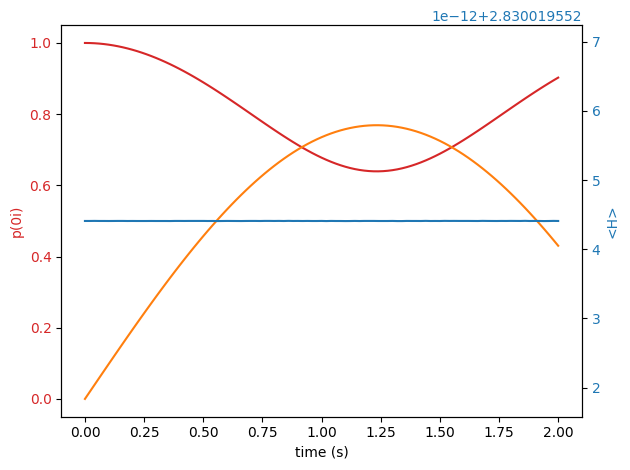

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('p(0i)', color= 'tab:red')
ax1.plot(tlist,p00list, color= 'tab:red')
ax1.plot(tlist,p01list, color= 'tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<H>', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(tlist,Hvevtlist, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Evolución en la base autoestados de H

La forma más eficaz de calcular la evolución de un estado arbitrario es expresarla en la base $\{\ket{n}\}$ de autoestados de $H \, \Rightarrow \,H \ket{n} = E_n \ket{n}~~~~n=1,..,N.$ $~$
En esta base, $H$ es una matriz $H_{mn}$ diagonal 

$$
H_{mn} =  \begin{bmatrix} E_0 &  & & \\  & E_1 &  & \\ & & \ddots & \\ & & & \end{bmatrix} =E_m \delta_{mn} \, .
$$

Entonces la matriz de evolución es también diagonal 

$$
U_{mn} = \exp\left(-\frac{i}{\hbar}t H_{mn}\right) = 
 \begin{bmatrix} e^{-\frac{i}{\hbar}t E_0} &  & & \\  & e^{-\frac{i}{\hbar} t E_1}  &  & \\ & & \ddots & \\ & & & \end{bmatrix} = e^{-\frac{i}{\hbar} t  E_m }\delta_{mn} \, .
$$

La evolución temporal de un autoestado de la energía es trivial (es una fase global)

$$
U(t,0)\ket{n} = e^{-\frac{i}{\hbar} t E_n} \ket{n}\, .
$$

Esta fase deja de ser trivial cuando afecta a una combinación lineal. . 
Es decir, si a $t=0$
$
\ket{\psi(t=0)} = \sum_n c_n \ket{n} \, ,
$
entonces, a tiempo $t$ 

$$
\ket{\psi(t)} = \sum_n c_n e^{-\frac{i}{\hbar}E_n} \ket{n} \, .
$$
    